# Tech Challenge - Fase 4
## Grupo 15
### João Luiz Pereira de Freitas - RM 358102
### Taiany Soares Ribeiro Giacomeli - RM 358555

Para configurar o ambiente, trabalhamos com o VSCode e o Python 3.12, seguindo o passo a passo abaixo:

* Criação do ambiente virtual pelo terminal:
    ```python3.12 -m venv venv```

* Ativação do ambiente:
    ```venv\Scripts\activate```

* Instalação das bibliotecas listadas no arquivo requirements.txt
    ```pip install -r requirements.txt```

Neste notebook trabalheremos com o treinamento e exportação do modelo, enquanto o aplicativo do streamlit ficará dentro do app.py

# Importando as bibiliotecas

In [ ]:
# Aqui fazemos a importação das bibliotecas que utilizaremos para o treino do modelo nesse notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from scipy.signal import periodogram
import joblib

c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\statsforecast\core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\statsforecast\utils.py:231: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


# Carregando os dados e realizando a análise exploratória

In [2]:
# Primeiro vamos importar os nossos dados

df_brent = pd.read_csv('base_ipea_2025_05_01.csv', sep=';')
df_brent.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,28/04/2025,"66,13"
1,25/04/2025,"66,99"
2,24/04/2025,"67,5"
3,23/04/2025,"68,26"
4,22/04/2025,"68,93"


In [3]:
df_brent.tail()

,Data,Preço - petróleo bruto - Brent (FOB)
11406,26/05/1987,"18,63"
11407,25/05/1987,"18,6"
11408,22/05/1987,"18,55"
11409,21/05/1987,"18,45"
11410,20/05/1987,"18,63"


Baseado nos métodos 'head' e 'tail', vemos que os dados estão padronizados, e não parece haver nenhum tipo de dado indesejado nem no começo e nem no final do dataframe.

In [4]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11411 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11411 non-null  object
dtypes: object(2)
memory usage: 178.4+ KB


Aqui podemos ver que as duas colunas possuem a mesma quantidade de valores (11411), e ambas estão formatadas como object, então precisaremos realizar a conversão para Date e Float respectivamente

In [5]:
df_brent.isnull().sum()

Data                                    0
Preço - petróleo bruto - Brent (FOB)    0
dtype: int64

Aqui podemos confirmar que não existem valores nulos em nossa base

In [6]:
# Para corrigir a questão da data e dos valores numéricos basta importar os dados novamente, porém agora utilizando o parse_dates e index_col para trazer a nossa coluna de data como DatetimeIndex.
# Também vamos especificar nossos separadores para que o python possa reconhecer os valores numéricos.

df_brent = pd.read_csv('base_ipea_2025_05_01.csv', sep=';', parse_dates=[0], index_col='Data', decimal=',', thousands='.')
df_brent.head()

C:\Users\joao1\AppData\Local\Temp\ipykernel_16456\3512833143.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_brent = pd.read_csv('base_ipea_2025_05_01.csv', sep=';', parse_dates=[0], index_col='Data', decimal=',', thousands='.')


,Preço - petróleo bruto - Brent (FOB)
Data,
2025-04-28,66.13
2025-04-25,66.99
2025-04-24,67.50
2025-04-23,68.26
2025-04-22,68.93


In [7]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11411 entries, 2025-04-28 to 1987-05-20
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Preço - petróleo bruto - Brent (FOB)  11411 non-null  float64
dtypes: float64(1)
memory usage: 178.3 KB


Agora podemos ver os nossos dados corretamente identificados como Dtype e float64

# Visualizando nossos dados

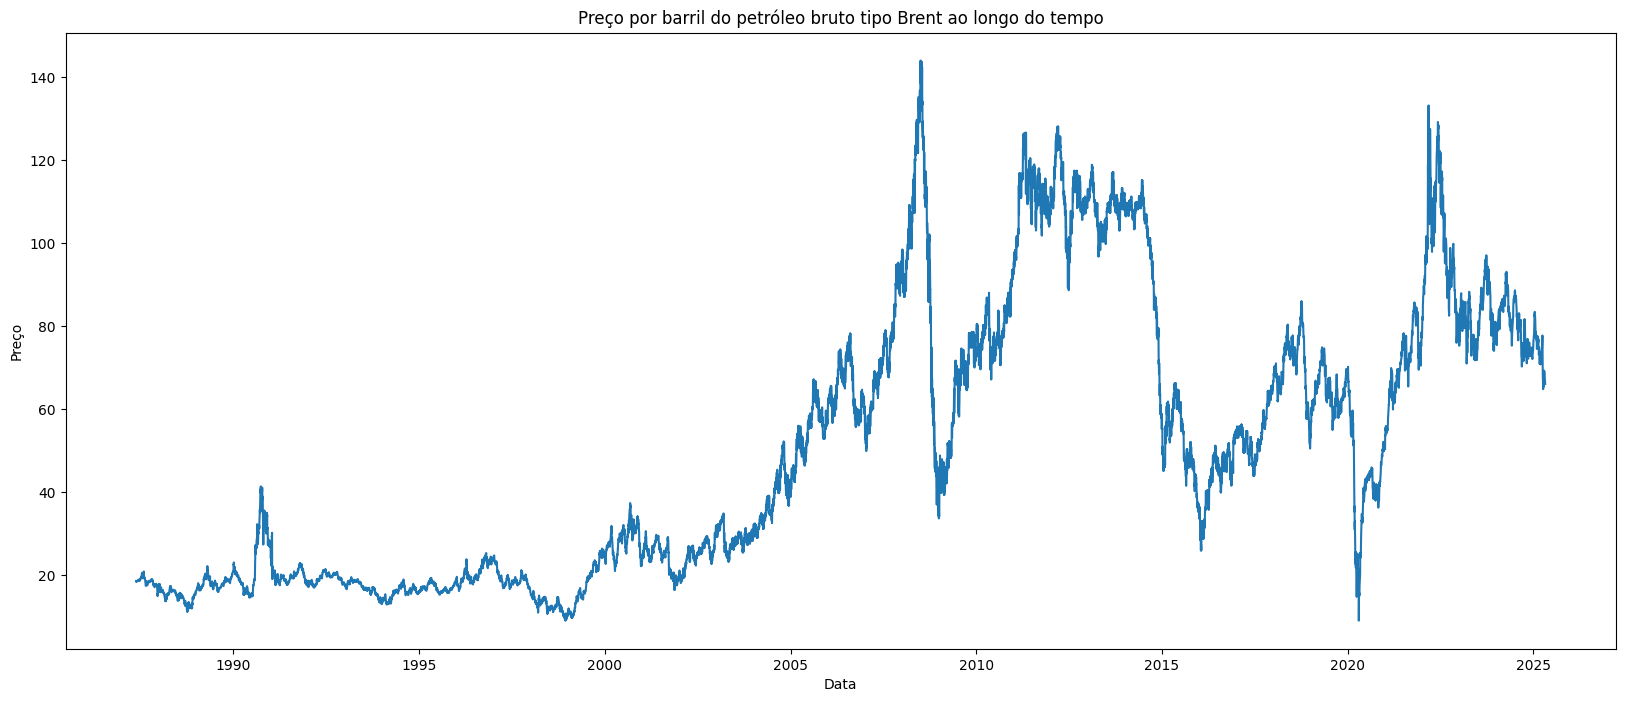

In [ ]:
# Primeiro vamos trabalhar com um gráfico de linha

plt.subplots(figsize=(20,8))
plt.plot(df_brent.index, df_brent['Preço - petróleo bruto - Brent (FOB)'])
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço por barril do petróleo bruto tipo Brent ao longo do tempo')
plt.show()

Aqui podemos ver claramente o crescimento no preço do barril desde o final dos anos 80 até 2025

Text(0, 0.5, 'Valor em US$')

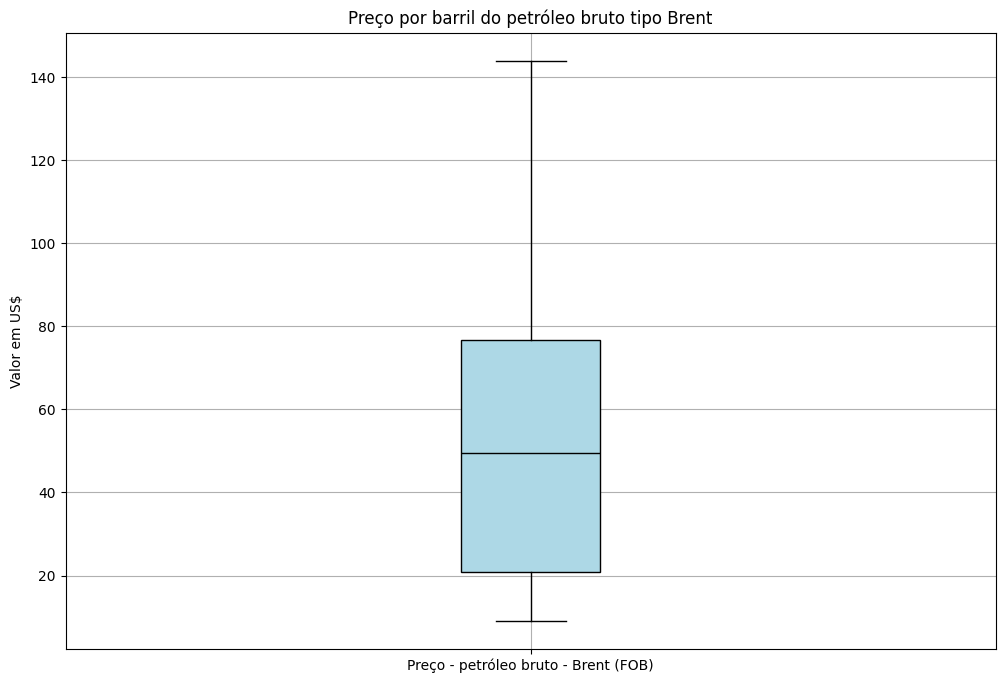

In [ ]:
# Agora faremos um boxplot

plt.subplots(figsize=(12,8))
fig = df_brent.boxplot(column='Preço - petróleo bruto - Brent (FOB)', 
                       patch_artist=True,
                       boxprops=dict(facecolor="lightblue", color="black"),
                       whiskerprops=dict(color="Black"),
                       capprops=dict(color="Black"),
                       medianprops=dict(color="Black"))
fig.set_title('Preço por barril do petróleo bruto tipo Brent')
fig.set_ylabel('Valor em US$')

Aqui podemos ver que não existem outliers quando olhamos para a base completa, e que mais de 75% dos dados mostram preços inferiores a 80US$ por barril

In [ ]:
# Agora vamos verificar a sazonalidade, tendência e ruídos
# Primeiro devemos configurar a frequência do nosso dataframe para 'diário'.

df_brent = df_brent.asfreq('D')

# Feito isso vamos utilizar o método forward fill (ffill) para preencher possíveis valores ausentes, vamos utilizar esse método, pois os dias em que o preço não foi contabilizado (finais de semana, feriados...) vão ser preenchidos com os últimos valores.

df_brent = df_brent.fillna(method='ffill')

# Agora podemos realizar a nossa decomposição sazonal.

dec = seasonal_decompose(df_brent['Preço - petróleo bruto - Brent (FOB)'], model='additive', period=365)

C:\Users\joao1\AppData\Local\Temp\ipykernel_16456\556910617.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_brent = df_brent.fillna(method='ffill')


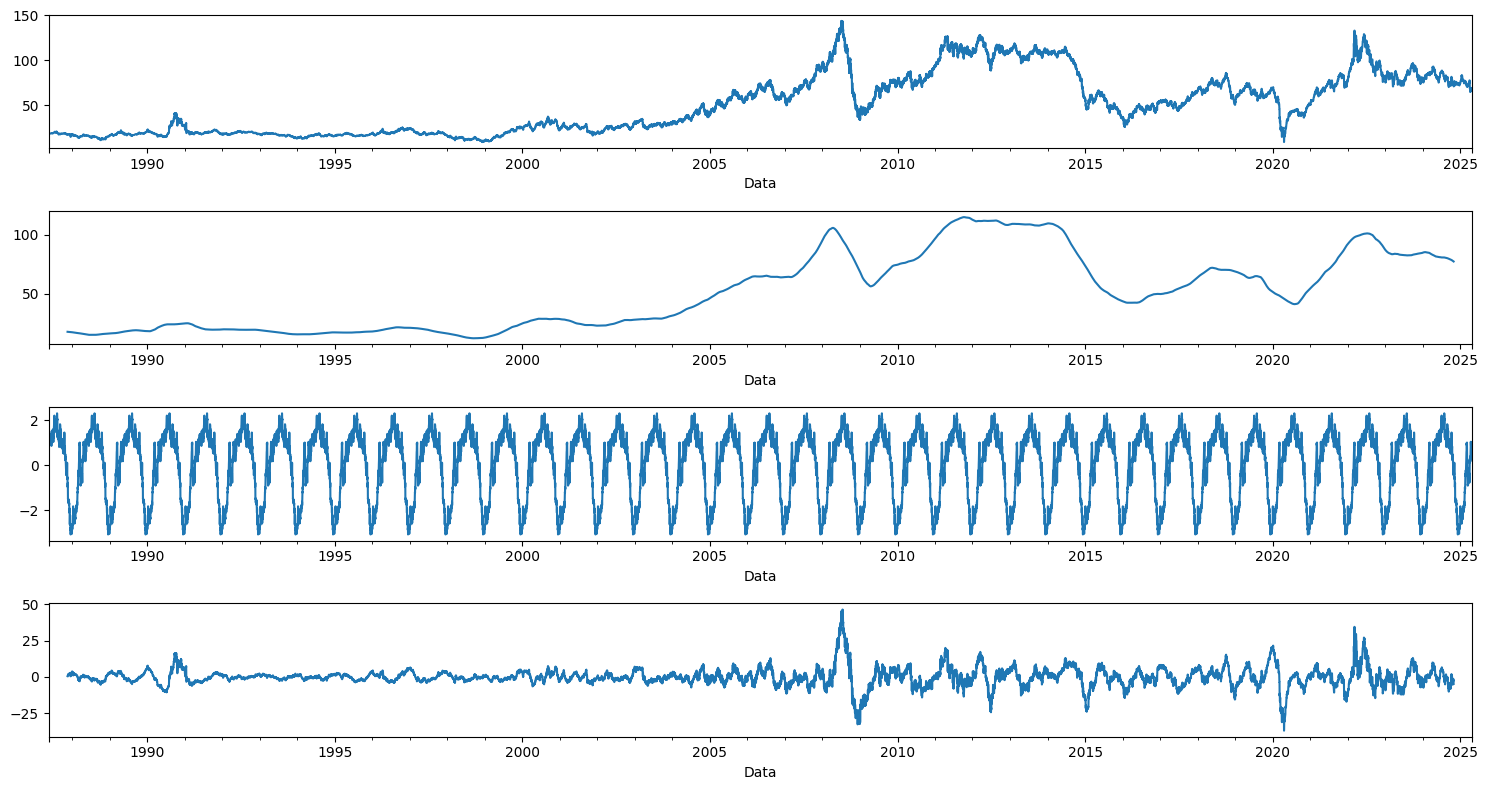

In [11]:
# Com a decomposição, podemos ver com certeza a existência de uma tendência de crescimento ao longo dos anos, e uma sazonalidade mais clara.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
dec.observed.plot(ax=ax1)
dec.trend.plot(ax=ax2)
dec.seasonal.plot(ax=ax3)
dec.resid.plot(ax=ax4)

plt.tight_layout()

* No primeiro gráfico vemos apenas os dados em um gráfico de linhas simples, que podemos usar como referência
* No segundo gráfico podemos ver a tendência de crescimento com mais clareza
* No terceiro gráfico observamos a sazonalidade que afeta o preço dos barris de maneira consistente todos os anos
* No último gráfico vemos os ruídos com mais clareza, com destaque para os anos de 1990-1991, 2008-2009, 2020-2021 e 2022-2023 

In [12]:
# Vamos prosseguir realizando o teste ADF (Augmented Dickey-Fuller), para verificar se nossa série é estacionaria ou não.

x = df_brent['Preço - petróleo bruto - Brent (FOB)'].values

result = adfuller(x)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
  print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -2.2480081632924676
P-Value: 0.1892846640925619
Valores críticos:
	1%: -3.4308234015188397
	5%: -2.8617492216753075
	10%: -2.566881363876303


Como o nosso p-valor foi de 18,93%, e o teste estatístico maior que os valores críticos, então essa série não é estacionária.

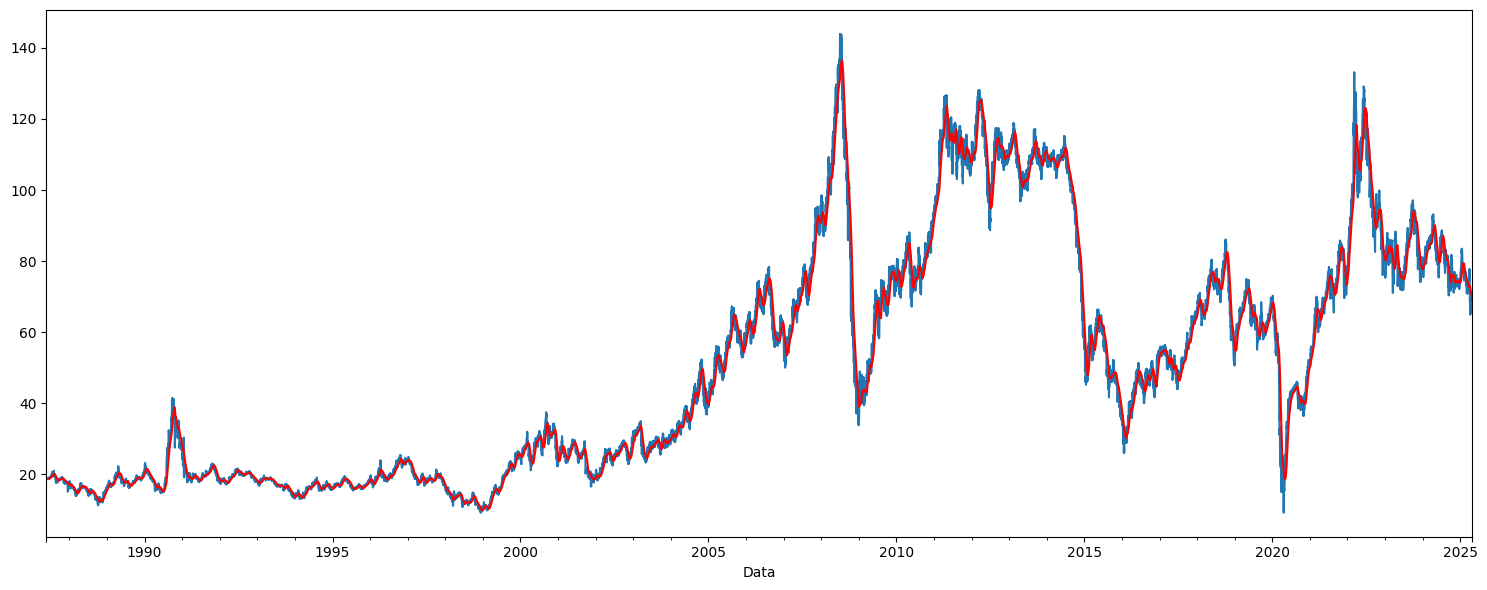

In [ ]:
# Como nossa série não é estacionária, vamos trabalhar com uma média móvel, e fazer transformações logaritmicas e de diferenciação, para tentar torná-la estacionária.

ma = df_brent['Preço - petróleo bruto - Brent (FOB)'].rolling(30).mean()

f, ax = plt.subplots()
df_brent['Preço - petróleo bruto - Brent (FOB)'].plot(ax=ax, legend=False, figsize=(15, 6))
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

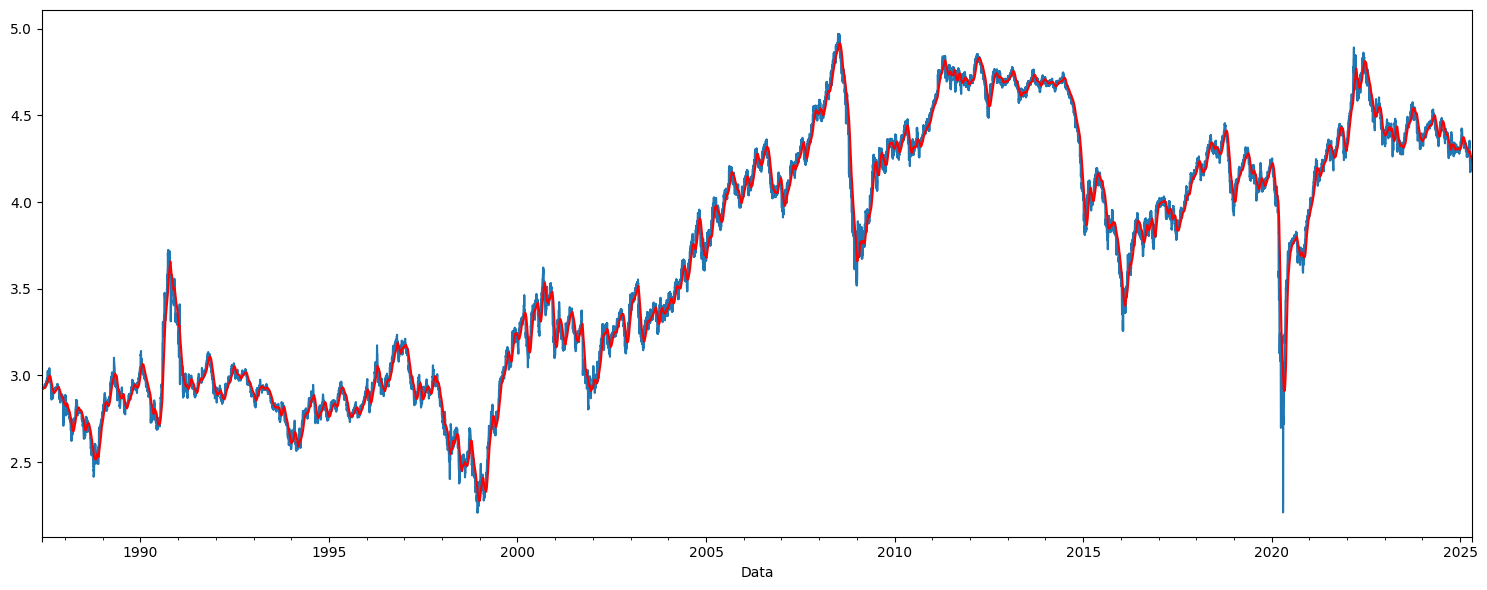

In [14]:
# Primeiro a transformação em escala de log, onde já temos uma boa redução da escala.

df_brent_log = np.log(df_brent['Preço - petróleo bruto - Brent (FOB)'])
ma_log = df_brent_log.rolling(30).mean()

f, ax = plt.subplots()
df_brent_log.plot(ax=ax, legend=False, figsize=(15, 6))
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

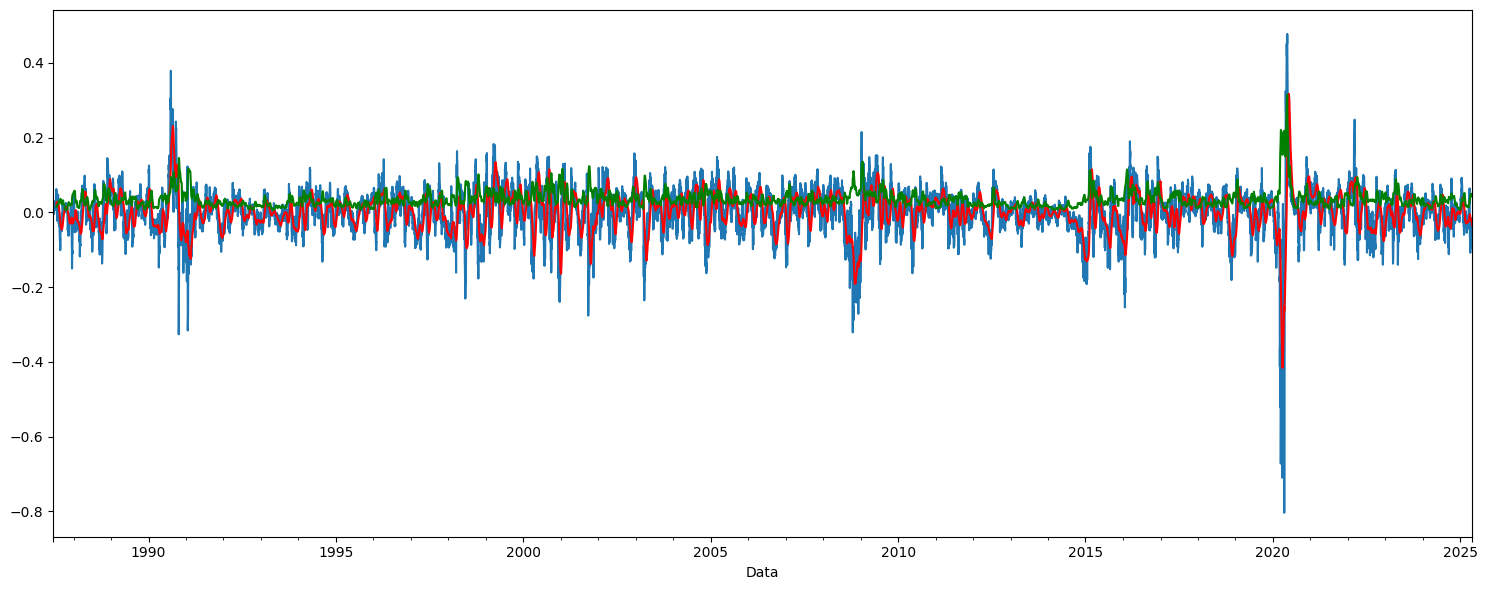

In [15]:
# Agora realizamos a subtração da escala com log.

df_brent_sub = (df_brent_log - ma_log).dropna()

ma_sub = df_brent_sub.rolling(30).mean()

std = df_brent_sub.rolling(30).std()

f, ax = plt.subplots()
df_brent_sub.plot(ax=ax, legend=False, figsize=(15, 6))
ma_sub.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [16]:
# Com a transformação feita, podemos realizar o teste novamente.

x_sub = df_brent_sub.values

result_sub = adfuller(x_sub)

print('Teste ADF')
print(f'Teste Estatístico: {result_sub[0]}')
print(f'P-Value: {result_sub[1]}')
print('Valores críticos:')

for key, value in result_sub[4].items():
  print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -15.266268639639474
P-Value: 4.784652865278049e-28
Valores críticos:
	1%: -3.43082439747165
	5%: -2.8617496618054354
	10%: -2.5668815981535253


Agora o p-valor foi bem inferior a 5%, e o teste estatístico menor que os valores críticos, então nossa série é estacionária.

Teste ADF
Teste Estatístico: -24.859422241690513
P-Value: 0.0
Valores críticos:
	1%: -3.430824363058694
	5%: -2.861749646597711
	10%: -2.566881590058593


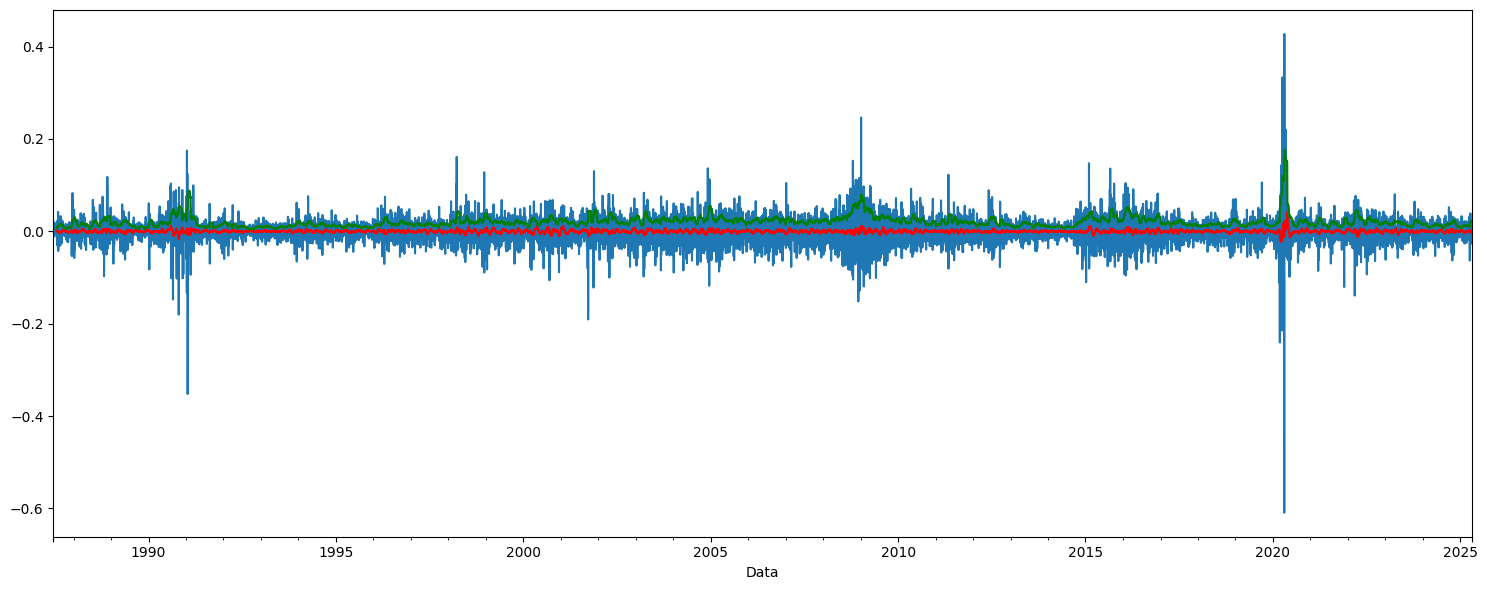

In [17]:
# Caso seja necessário, é possível deixar a série ainda mais estacionária, trabalhando com diferenciação.

df_brent_diff = df_brent_sub.diff(1)
ma_diff = df_brent_diff.rolling(30).mean()
std_diff = df_brent_diff.rolling(30).std()

f, ax = plt.subplots()
df_brent_diff.plot(ax=ax, legend=False, figsize=(15, 6))
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

x_diff = df_brent_diff.dropna().values

result_diff = adfuller(x_diff)

print('Teste ADF')
print(f'Teste Estatístico: {result_diff[0]}')
print(f'P-Value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
  print(f'\t{key}: {value}')

Agora o nosso p-valor foi de 0, e nosso teste estatístico ficou ainda menor que os valores critícos.

Lembrando que muitos modelos estatísticos tradicionais de séries temporais, como o ARIMA, dependem que a série temporal seja estacionária, por isso as transformações acima foram necessárias.

<function matplotlib.pyplot.show(close=None, block=None)>

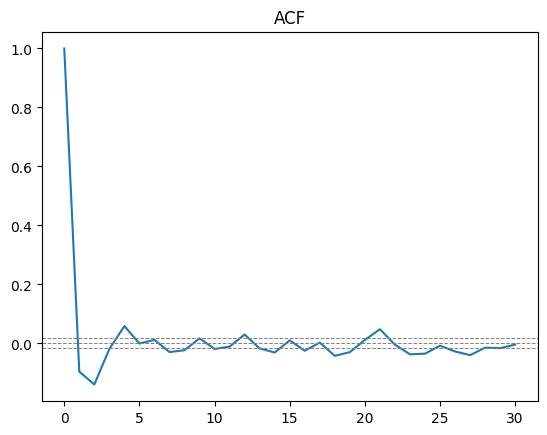

In [18]:
# Como conseguimos deixar a nossa série estacionária, podemos realizar os testes ACF e PACF (Autocorrelaçao e Autocorrelação parcial)
# Aqui vamos selecionar um lag de 30 dias inicialmente, para puxar 1 mês inteiro, porém podemos alterar esse parâmetro caso necessário.

lag_acf = acf(df_brent_diff.dropna(), nlags=30)

lag_pacf = pacf(df_brent_diff.dropna(), nlags=30)

plt.plot(lag_acf)

plt.axhline(y=-1.96/(np.sqrt((len(df_brent_diff)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)

plt.axhline(y=1.96/(np.sqrt((len(df_brent_diff)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('ACF')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

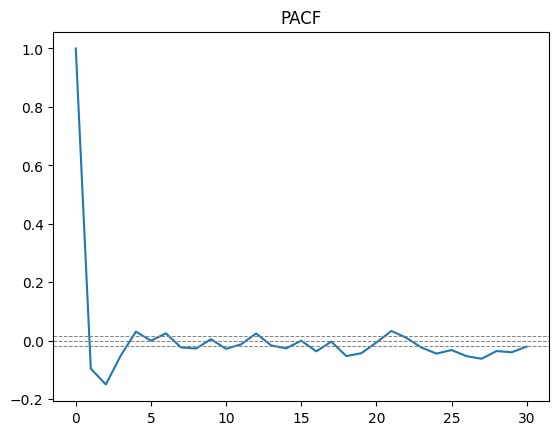

In [19]:
plt.plot(lag_pacf)

plt.axhline(y=-1.96/(np.sqrt((len(df_brent_diff)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)

plt.axhline(y=1.96/(np.sqrt((len(df_brent_diff)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('PACF')
plt.show

Podemos ver que os dois gráficos são bem parecidos, então estamos trabalhando com um estrutura simples.

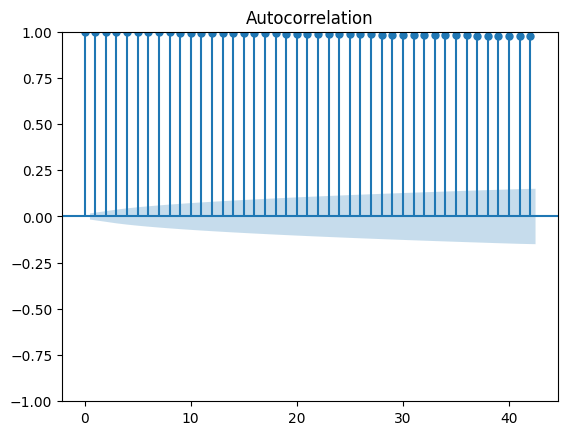

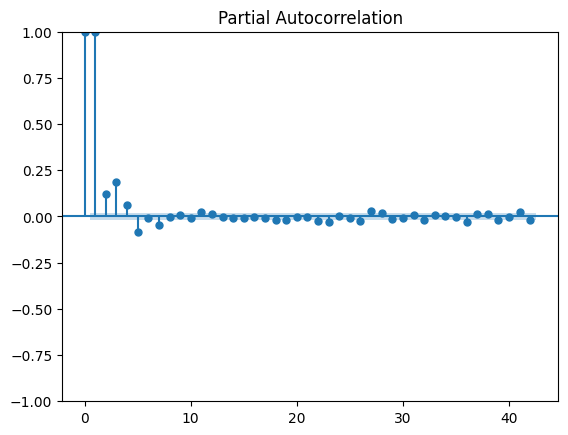

In [20]:
plot_acf(df_brent['Preço - petróleo bruto - Brent (FOB)'])
plot_pacf(df_brent['Preço - petróleo bruto - Brent (FOB)'])
plt.show()

Podemos ver que na autocorrelação todos os nossos itens então fora do intervalo de confiança, enquanto na autocorrelação parcial occore o oposto, com a maioria dos dados dentro do intervalo de confiança.

Period: 13859.0 days


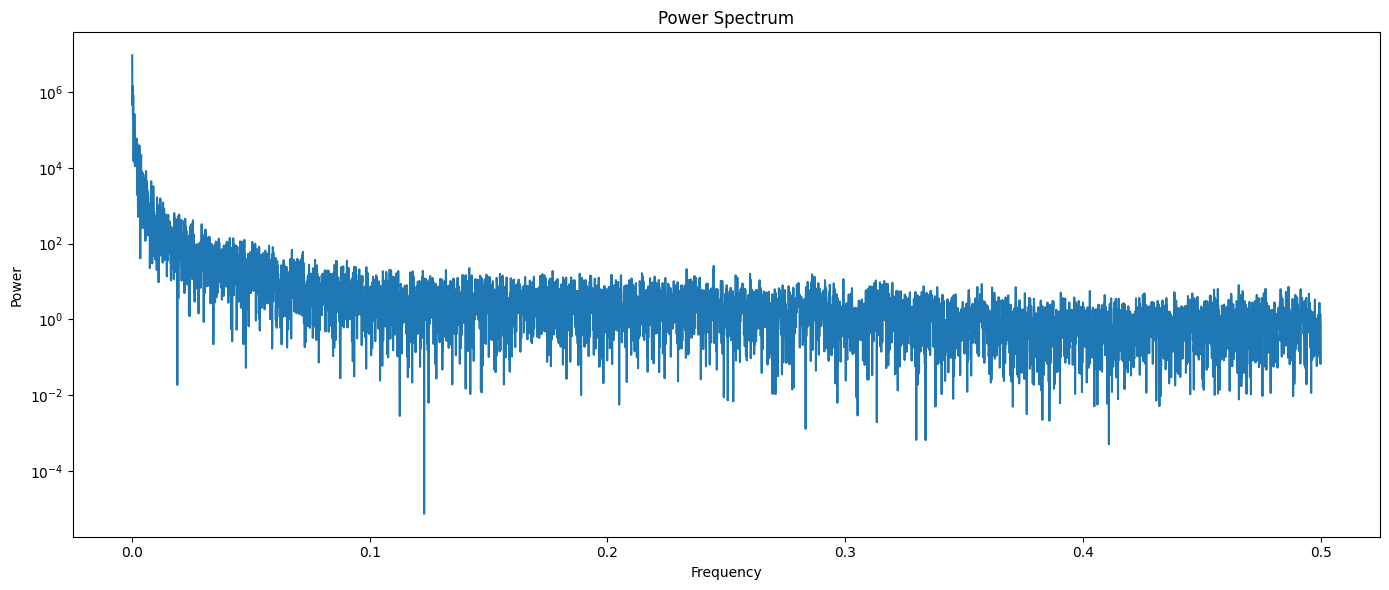

In [ ]:
# Por último vamos usar os termos de fourrier como outra maneira de verificar a sazonalidade.

frequency, power = periodogram(df_brent['Preço - petróleo bruto - Brent (FOB)'].dropna(), fs=1)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(frequency[1:], power[1:])
ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')
ax.set_yscale('log')
ax.get_figure().set_tight_layout(True)

freq = frequency[np.argmax(power)]
period = 1 / freq

print(f'Period: {period} days')

df_brent['fourier_sin'] = np.sin(2 * np.pi * freq * np.arange(len(df_brent)))
df_brent['fourier_cos'] = np.cos(2 * np.pi * freq * np.arange(len(df_brent)))

array([<Axes: xlabel='Data'>, <Axes: xlabel='Data'>], dtype=object)

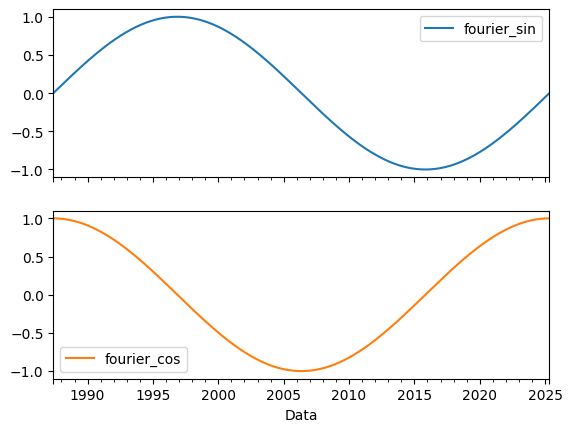

In [22]:
# Como podemos ver abaixo, foi encontrada uma sazonalidade além da anual vista na decomposição, as diversas crises que influenciaram no preço do barril de petróleo ao longo dos anos são as causas mais prováveis.

df_brent[['fourier_sin', 'fourier_cos']].plot(subplots=True)

# Treinamento dos modelos

In [23]:
# Com a análise exploratória finalizada, podemos seguir para a criação dos nossos modelos

df_brent = df_brent.reset_index()
df_brent.head()

,Data,Preço - petróleo bruto - Brent (FOB),fourier_sin,fourier_cos
0,1987-05-20,18.63,0.000000,1.000000
1,1987-05-21,18.45,0.000453,1.000000
2,1987-05-22,18.55,0.000907,1.000000
3,1987-05-23,18.55,0.001360,0.999999
4,1987-05-24,18.55,0.001813,0.999998


In [24]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  13859 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  13859 non-null  float64       
 2   fourier_sin                           13859 non-null  float64       
 3   fourier_cos                           13859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 433.2 KB


In [25]:
# Renomear as colunas que vamos trabalhar, pois as bibliotecas exigem nomes específcos

df_brent_model = df_brent[['Data', 'Preço - petróleo bruto - Brent (FOB)']]
df_brent_model['unique_id'] = 'preco'
df_brent_model = df_brent_model.rename(columns={'Data': 'ds', 'Preço - petróleo bruto - Brent (FOB)': 'y'})
df_brent_model

C:\Users\joao1\AppData\Local\Temp\ipykernel_16456\1201992449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent_model['unique_id'] = 'preco'


,ds,y,unique_id
0,1987-05-20,18.63,preco
1,1987-05-21,18.45,preco
2,1987-05-22,18.55,preco
3,1987-05-23,18.55,preco
4,1987-05-24,18.55,preco
...,...,...,...
13854,2025-04-24,67.50,preco
13855,2025-04-25,66.99,preco
13856,2025-04-26,66.99,preco
13857,2025-04-27,66.99,preco


In [26]:
df_brent_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         13859 non-null  datetime64[ns]
 1   y          13859 non-null  float64       
 2   unique_id  13859 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 324.9+ KB


In [27]:
# Aqui selecionamos tudo anterior a fevereiro de 2025 para treino, e o período entre fevereiro de 2025 e vinte e oito de abril de 2025 para teste

treino = df_brent_model.loc[df_brent_model['ds'] < '2025-02-01']
valid = df_brent_model.loc[(df_brent_model['ds'] >= '2025-02-01') & (df_brent_model['ds'] <= '2025-04-28')]
h = valid['ds'].nunique()
h

87

In [28]:
# Vamos calcular o erro percentual médio

def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [29]:
treino.head()

,ds,y,unique_id
0,1987-05-20,18.63,preco
1,1987-05-21,18.45,preco
2,1987-05-22,18.55,preco
3,1987-05-23,18.55,preco
4,1987-05-24,18.55,preco


WMAPE: 6.70%


c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


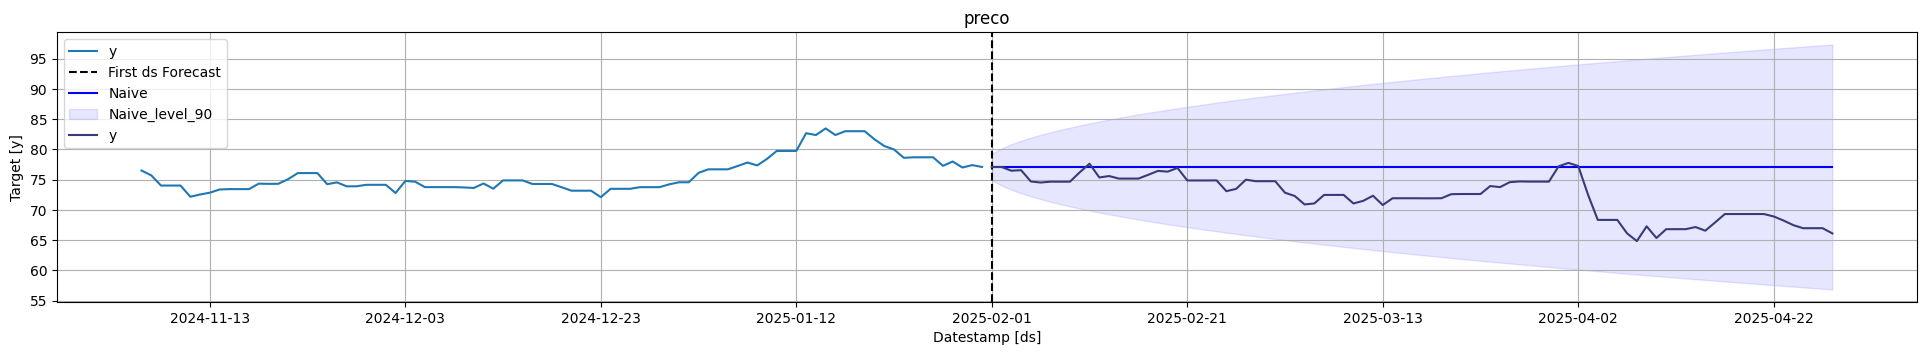

In [30]:
# Modelo Naive

model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['preco'], engine ='matplotlib', max_insample_length=87)

WMAPE: 9.95%


c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


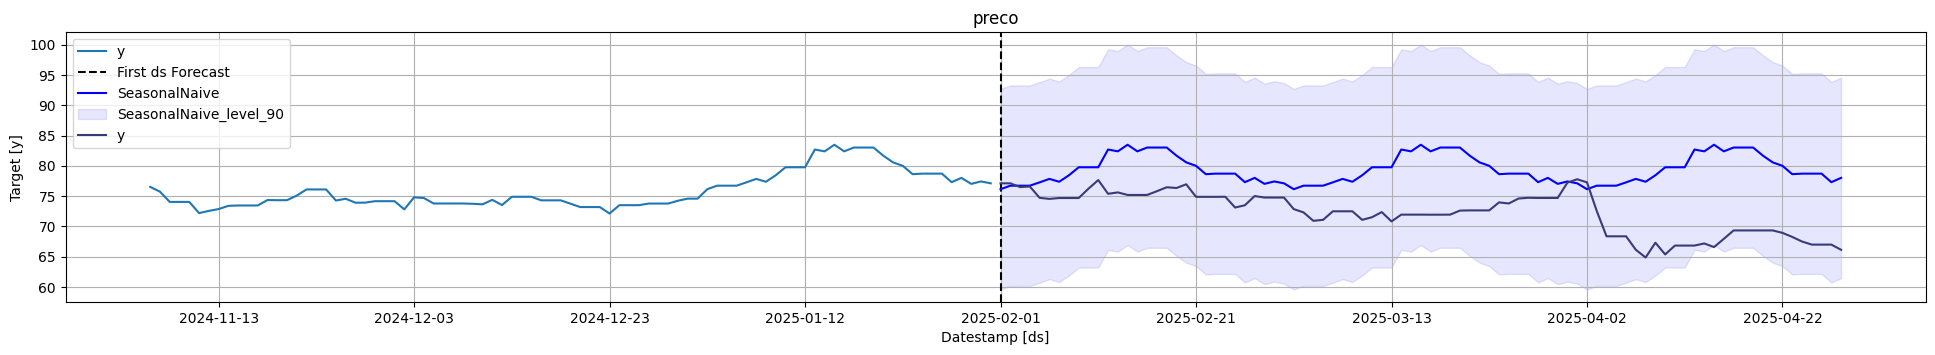

In [31]:
# Modelo Seasonal Naive

model_s = StatsForecast(models=[SeasonalNaive(season_length=30)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['preco'], engine ='matplotlib', max_insample_length=87)

WMAPE: 9.75%


c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


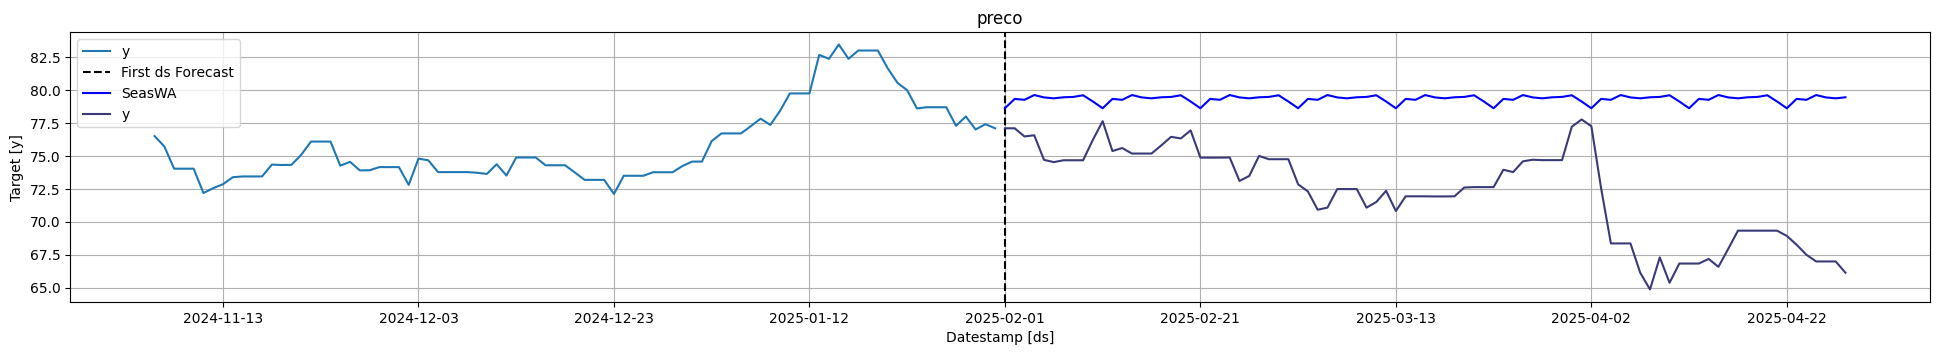

In [32]:
# Modelo Seasonal Window Average

model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=10, window_size=3)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['preco'], engine ='matplotlib', max_insample_length=87)

c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


WMAPE: 6.76%


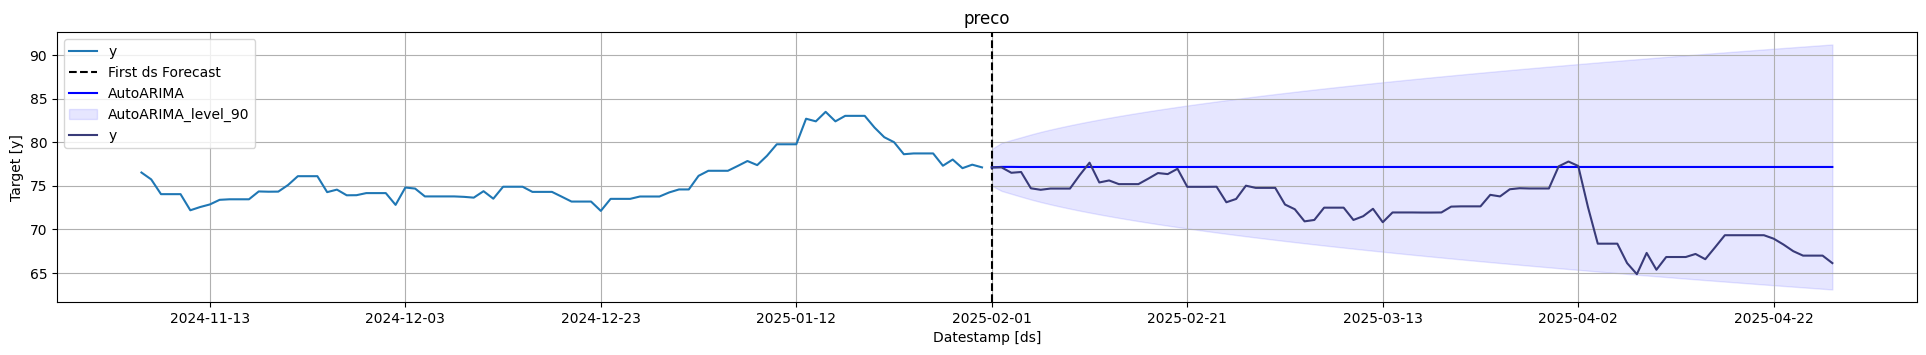

In [33]:
# Modelo ARIMA

model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['preco'], engine ='matplotlib', max_insample_length=87)

In [34]:
# Vamos fazer agora um processo de treinamento inclua uma estratégia de backtesting iterativa para o modelo ARIMA

# Passo 1 - Definir o conjunto de teste para os últimos 10 dias
ultimo_ano = df_brent_model['ds'].max()
inicio_teste = ultimo_ano - pd.DateOffset(days=10)
treino = df_brent_model[df_brent_model['ds'] < inicio_teste]
teste = df_brent_model[df_brent_model['ds'] >= inicio_teste]

# Passo 2 - Inicializando uma lista para armazenar os erros
erros = []
previstos = []

# Passo 3 - Treinamento e teste iterativos
for i in range(len(teste)):
    # Definindo o subconjunto de treino até o dia de teste atual
    dado_treino_atual = pd.concat([treino, teste.iloc[:i]], ignore_index=False).copy()

    # Treinando o modelo ARIMA com hiperparâmetros encontrados
    model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
    model_a = model_a.fit(dado_treino_atual)

    # Fazendo a previsão para o próximo dia de teste
    forecast = model_a.predict(h=1)

    # Avaliando o modelo
    valor_real = teste.iloc[i]['y']
    valor_previsto = forecast.iloc[0]['AutoARIMA']

    # Armazenar o valor previsto
    previstos.append(valor_previsto)

    # Calcular o erro percentual (MAPE)
    erro_percentual = abs((valor_real - valor_previsto) / valor_real) * 100
    erros.append(erro_percentual)

# Calculando MAPE e Acurácia
mape = np.mean(erros)
acuracia = 100 - mape

# Exibindo os resultados
print(f"MAPE: {mape:.2f}%")
print(f"Acurácia do modelo: {acuracia:.2f}%")

c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
c:\Users\joao1\Downloads\Tech 

MAPE: 0.68%
Acurácia do modelo: 99.32%


c:\Users\joao1\Downloads\Tech challenge\venv\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


In [35]:
# Gerando um dataframe com o resultado das métricas de erro para cada modelo

resultados = pd.DataFrame(
    {
        "Modelo": ['Naive', 'Seasonal Naive', 'Seasonal Window Average', 'ARIMA', 'ARIMA + Backtesting'],
        "WMAPE": [f"{wmape1:.2%}", f"{wmape2:.2%}", f"{wmape3:.2%}", f"{wmape4:.2%}", f"{mape:.2f}%"],
        "Acuracidade": [f"{1-wmape1:.2%}", f"{1-wmape2:.2%}", f"{1-wmape3:.2%}", f"{1-wmape4:.2%}", f"{acuracia:.2f}%"],
    }
).set_index('Modelo').sort_values('WMAPE')

resultados

,WMAPE,Acuracidade
Modelo,,
ARIMA + Backtesting,0.68%,99.32%
Naive,6.70%,93.30%
ARIMA,6.76%,93.24%
Seasonal Window Average,9.75%,90.25%
Seasonal Naive,9.95%,90.05%


In [36]:
# Exportando o modelo escolhido

joblib.dump(model_a, 'model_arima.joblib')

['model_arima.joblib']